In [4]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import shap
shap.initjs()

In [5]:
data = pd.read_csv('abalone.csv')

In [7]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Text(0, 0.5, 'whole weight')

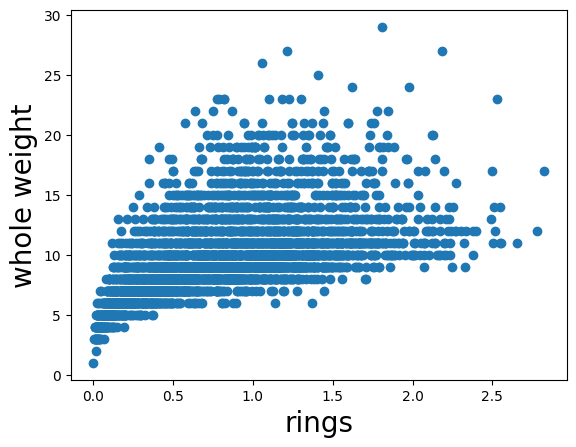

In [11]:
plt.scatter(data['Whole weight'], data['Rings'])
plt.xlabel('rings', size = 20)
plt.ylabel('whole weight', size = 20)

Text(0.5, 0, 'sex')

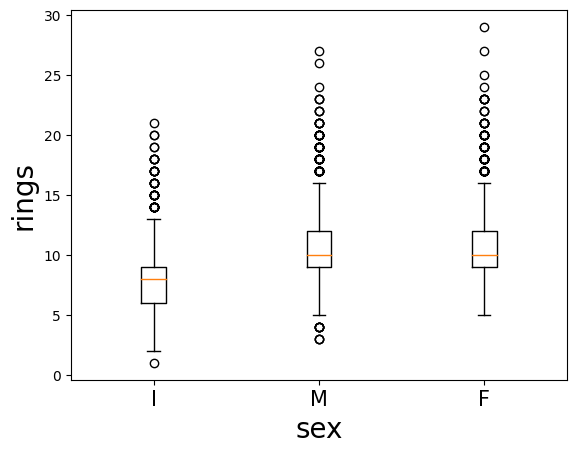

In [19]:
plt.boxplot(data[data.Sex=="I"]['Rings'], positions=[1])
plt.boxplot(data[data.Sex == "M"]['Rings'], positions=[2])
plt.boxplot(data[data.Sex == "F"]['Rings'], positions=[3])

plt.xticks(ticks=[1, 2, 3], labels=["I", "M", "F"], size= 15)
plt.ylabel('rings', size = 20)
plt.xlabel('sex', size = 20)

In [20]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<Axes: >

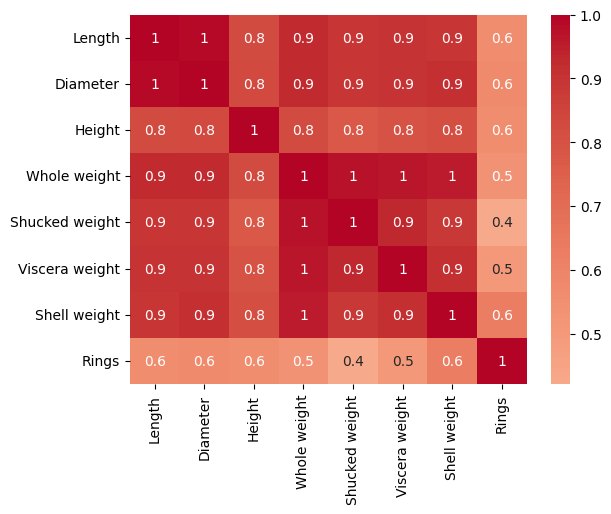

In [24]:
cont = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']

corr_matrix = pd.DataFrame(data[cont], columns=cont).corr()

sns.heatmap(corr_matrix, 
           cmap='coolwarm',
            center = 0,
           annot=True,
           fmt='.1g')

In [25]:
corr_matrix

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# Feature Engineering

In [33]:
y = data['Rings']
X = data[['Sex', 'Length', 'Height', 'Shucked weight',
       'Viscera weight', 'Shell weight']]

In [34]:
X['Sex.M'] = [1 if s == 'M' else 0 for s in X['Sex']]
X['Sex.F'] = [1 if s == 'F' else 0 for s in X['Sex']]
X['Sex.I'] = [1 if s == 'I' else 0 for s in X['Sex']]

X = X.drop('Sex', axis = 1)
X.head()

/tmp/ipykernel_6189/3955994644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex.M'] = [1 if s == 'M' else 0 for s in X['Sex']]
/tmp/ipykernel_6189/3955994644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex.F'] = [1 if s == 'F' else 0 for s in X['Sex']]


,Length,Height,Shucked weight,Viscera weight,Shell weight,Sex.M,Sex.F,Sex.I
0,0.455,0.095,0.2245,0.1010,0.150,1,0,0
1,0.350,0.090,0.0995,0.0485,0.070,1,0,0
2,0.530,0.135,0.2565,0.1415,0.210,0,1,0
3,0.440,0.125,0.2155,0.1140,0.155,1,0,0
4,0.330,0.080,0.0895,0.0395,0.055,0,0,1


# Modelling

In [35]:
#Train model
model = xgb.XGBRegressor(objective = "reg:squarederror")
model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
#Get predictons
y_pred = model.predict(X)

Text(0, 0.5, 'Predicted')

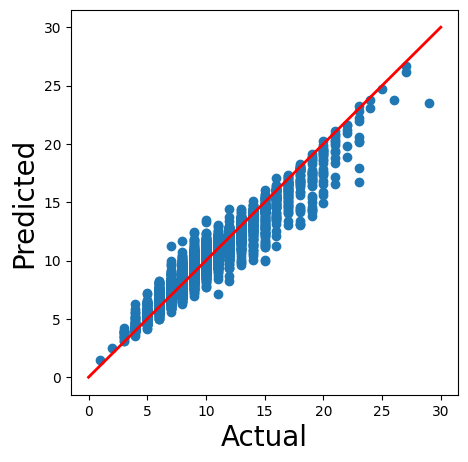

In [43]:
#model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y, y_pred)
plt.plot([0, 30], [0, 30],
        color='r',
        linestyle="-",
        linewidth=2)
plt.xlabel('Actual', size=20)
plt.ylabel('Predicted',size = 20)

# SHAP

In [49]:
explainer = shap.Explainer(model)
shap_values = explainer(X[:100])

In [50]:
np.shape(shap_values.values)

(100, 8)

In [52]:
# shap_values

# Waterfall plot 

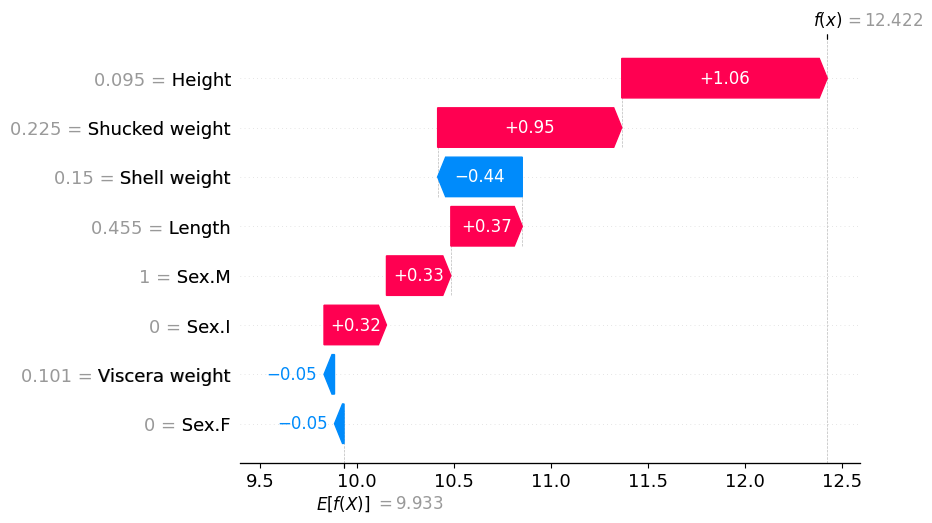

In [53]:
shap.plots.waterfall(shap_values[0])

# Force plot

In [55]:
shap.plots.force(shap_values[0])

# Stacked force plot

In [56]:
shap.plots.force(shap_values[0:100])

# Absolute Mean SHAP

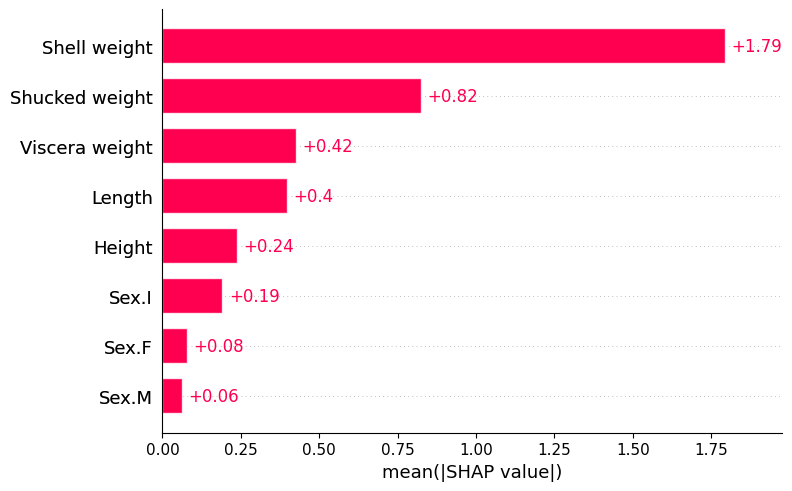

In [57]:
shap.plots.bar(shap_values)

# Beeswarm plot

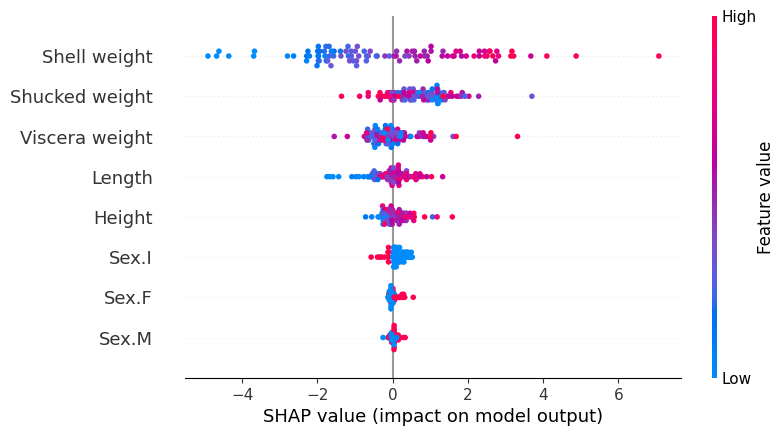

In [58]:
shap.plots.beeswarm(shap_values)

# Dependence plots

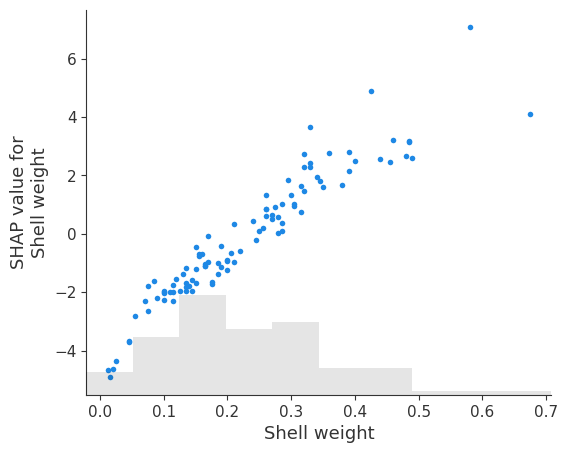

In [61]:
#plot 1:shell weight
shap.plots.scatter(shap_values[:,"Shell weight"])

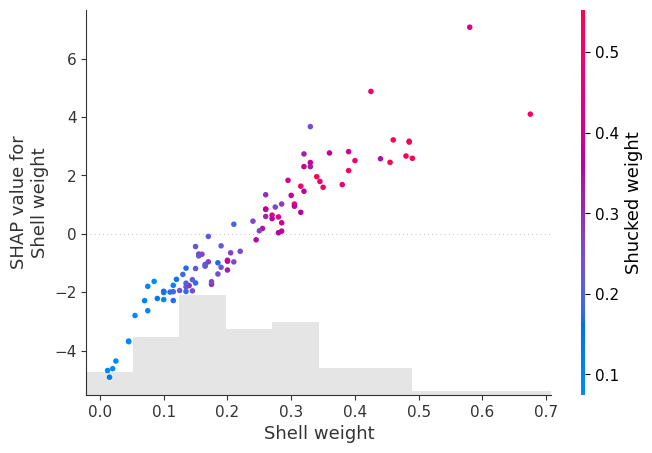

In [62]:
shap.plots.scatter(shap_values[:,'Shell weight'], 
                  color=shap_values[:, 'Shucked weight'])

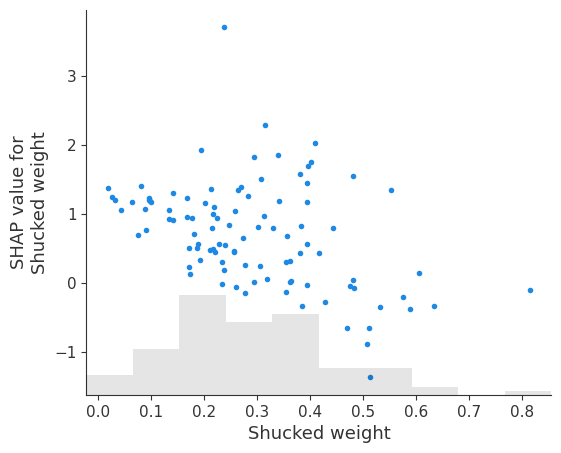

In [63]:
#plot 2: shucked weight
shap.plots.scatter(shap_values[:, 'Shucked weight'])

# 3) Custom plots